In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200
...,...,...,...,...,...,...,...
10571,2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
10572,2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
10573,2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
10574,2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


In [2]:
df.shape

(10576, 7)

In [3]:
df.describe

<bound method NDFrame.describe of              Date        Open        High         Low       Close   Adj Close  \
0      1981-01-02    0.154018    0.155134    0.154018    0.154018    0.119849   
1      1981-01-05    0.151228    0.151228    0.150670    0.150670    0.117244   
2      1981-01-06    0.144531    0.144531    0.143973    0.143973    0.112032   
3      1981-01-07    0.138393    0.138393    0.137835    0.137835    0.107256   
4      1981-01-08    0.135603    0.135603    0.135045    0.135045    0.105085   
...           ...         ...         ...         ...         ...         ...   
10571  2022-12-05  147.770004  150.919998  145.770004  146.630005  146.630005   
10572  2022-12-06  147.070007  147.300003  141.919998  142.910004  142.910004   
10573  2022-12-07  142.190002  143.369995  140.000000  140.940002  140.940002   
10574  2022-12-08  142.360001  143.520004  141.100006  142.649994  142.649994   
10575  2022-12-09  142.339996  145.570007  140.899994  142.160004  142.1600

In [4]:
#Cek info pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10576 entries, 0 to 10575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10576 non-null  object 
 1   Open       10576 non-null  float64
 2   High       10576 non-null  float64
 3   Low        10576 non-null  float64
 4   Close      10576 non-null  float64
 5   Adj Close  10576 non-null  float64
 6   Volume     10576 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 578.5+ KB


In [22]:
df.pop("Volume")

df

,Date,Open,High,Low,Close
0,1981-01-02,0.154018,0.155134,0.154018,0.154018
1,1981-01-05,0.151228,0.151228,0.150670,0.150670
2,1981-01-06,0.144531,0.144531,0.143973,0.143973
3,1981-01-07,0.138393,0.138393,0.137835,0.137835
4,1981-01-08,0.135603,0.135603,0.135045,0.135045
...,...,...,...,...,...
10571,2022-12-05,147.770004,150.919998,145.770004,146.630005
10572,2022-12-06,147.070007,147.300003,141.919998,142.910004
10573,2022-12-07,142.190002,143.369995,140.000000,140.940002
10574,2022-12-08,142.360001,143.520004,141.100006,142.649994


In [23]:
#Cek korelasi pada dataset

#Versi komples corr() -> DataFrame.corr(self, method=’pearson’, min_periods=1) 
df[df.columns[1:]].corr()

korelasi = df.corr()
korelasi

,Open,High,Low,Close
Open,1.000000,0.999939,0.999924,0.999840
High,0.999939,1.000000,0.999910,0.999924
Low,0.999924,0.999910,1.000000,0.999926
Close,0.999840,0.999924,0.999926,1.000000


In [ ]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

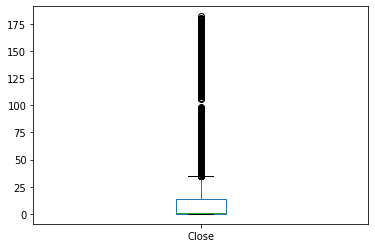

In [ ]:
#Cek outlier
plot_boxplot(df, "Close")

In [ ]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR =  Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

  return ls

In [ ]:
index_list = []
for variable in ['Close']:
  index_list.extend(outliers(df, variable))

In [ ]:
index_list

In [ ]:
def remove (df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
df_cleaned.shape

(9111, 7)

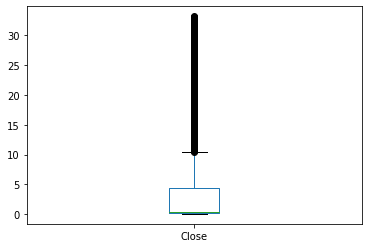

In [ ]:
plot_boxplot(df_cleaned, 'Close')

In [ ]:
df_cleaned.to_csv('New_AAPL.csv', index=False)